# Lab 1 Trend Analysis


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Variable of interest: 'happy'


I want to take a look at how people feel about happiness changes over time. The question is asked as following:
Taken all together, how would you say things are these days - would you say that you are very happy, pretty happy, or not too happy?
1	VERY HAPPY
2	PRETTY HAPPY
3	NOT TOO HAPPY


In [ ]:
# read in data from the trends-gss.csv file
gss = pd.read_csv("trends-gss.csv")

In [ ]:
gss.shape

(57061, 297)

In [ ]:
# keep only the 'happy', 'year', 'sex' variables
sub = gss[['happy', 'year', 'sex']]

# drop missing values
sub = sub.dropna()

In [ ]:
sub.shape

(10554, 4)

In [ ]:
# Reverse-code happy so that a larger number indicates more happiness
sub['n_happy'] = sub['happy'].replace([1, 3], [3, 1])

Explore data

In [ ]:
sub.head()

,happy,year,sex,n_happy
0,3.0,1972.0,2.0,1.0
1,3.0,1972.0,1.0,1.0
2,2.0,1972.0,2.0,2.0
3,3.0,1972.0,2.0,1.0
4,2.0,1972.0,2.0,2.0


In [ ]:
sub.tail()

,happy,year,sex,n_happy
10587,3.0,1978.0,1.0,1.0
10588,2.0,1978.0,2.0,2.0
10589,1.0,1978.0,2.0,3.0
10590,2.0,1978.0,1.0,2.0
10591,2.0,1978.0,2.0,2.0


In [ ]:
sub.describe()

,happy,year,sex,n_happy
count,10554.000000,10554.000000,10554.000000,10554.000000
mean,1.786621,1974.964563,1.542164,2.213379
std,0.651953,2.010131,0.498243,0.651953
min,1.000000,1972.000000,1.000000,1.000000
25%,1.000000,1973.000000,1.000000,2.000000
50%,2.000000,1975.000000,2.000000,2.000000
75%,2.000000,1977.000000,2.000000,3.000000
max,3.000000,1978.000000,2.000000,3.000000


In [ ]:
sub['n_happy'].value_counts()

2.0    5588
3.0    3609
1.0    1357
Name: n_happy, dtype: int64

In [ ]:
sub['n_happy'].value_counts(normalize=True)

2.0    0.529468
3.0    0.341956
1.0    0.128577
Name: n_happy, dtype: float64

For all of the years, about 34.2% of respondents think that they are very happy; 52.9% think they are pretty happy; and only 12.9% think that they are not too happy.

## Graph the trend

In [ ]:
# calculate mean natcrime of each year
by_year = sub.groupby('year', as_index = False).agg({"n_happy": "mean"})\
          .rename(columns = {"n_happy": "mean_happy"})

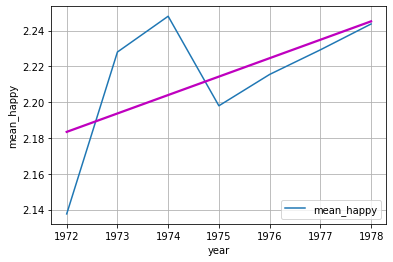

In [ ]:
# plot the trend using matplotlib 
by_year.plot(x = 'year', y = 'mean_happy', grid = True)

# superimpose a fitted line using the seaborn package
sns.regplot(x = 'year', y = 'mean_happy', data = by_year, 
            scatter = False, ci = None, fit_reg = True, color = 'm')

From the picture, we can see that people generally feel happier from 1972 to 1978 with an exception of 1975 when more people feel less happy than the previous year.


## Fit an OLS model

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# fit regression model
lm_happy = smf.ols('n_happy ~ year', data = sub).fit()
lm_happy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_happy   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     11.37
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           0.000748
Time:                        04:04:44   Log-Likelihood:                -10454.
No. Observations:               10554   AIC:                         2.091e+04
Df Residuals:                   10552   BIC:                         2.093e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.8052      6.232     -3.017      0.003     -31.022      -6.589
year           0.0106      0.003      3.373      0.001       0.004       0.017
==============================================================================
Omnibus:                      742.669   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.676
Skew:                          -0.242   Prob(JB):                     4.73e-74
Kurtosis:                       2.270   Cond. No.                     1.94e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model shows that with each year that passes, happiness increases, on average, by 1.06%. The p-value for year coefficient is 0.001, which is quite statistically significant. The Adjusted R-squared from this model is 0.001, suggesting that we can
explain about 0.1% of the variation in happiness with time trend, which seems low.


## Use dummy variables for each year

In [ ]:
# refit model using 'year' as dummy variable
lm_happy2 = smf.ols('n_happy ~ C(year)', data = sub).fit()
lm_happy2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_happy   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.263
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           2.00e-05
Time:                        04:05:06   Log-Likelihood:                -10444.
No. Observations:               10554   AIC:                         2.090e+04
Df Residuals:                   10547   BIC:                         2.095e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.1376      0.016    131.556      0.000       2.106       2.169
C(year)[T.1973.0]     0.0904      0.023      3.866      0.000       0.045       0.136
C(year)[T.1974.0]     0.1104      0.023      4.704      0.000       0.064       0.156
C(year)[T.1975.0]     0.0604      0.023      2.575      0.010       0.014       0.106
C(year)[T.1976.0]     0.0779      0.023      3.330      0.001       0.032       0.124
C(year)[T.1977.0]     0.0916      0.023      3.936      0.000       0.046       0.137
C(year)[T.1978.0]     0.1060      0.024      4.501      0.000       0.060       0.152
==============================================================================
Omnibus:                      725.199   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.135
Skew:                          -0.244   Prob(JB):                     1.68e-73
Kurtosis:                       2.276   Cond. No.                         7.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All coefficients of year dummies give positive effects and are statistically significant, except for 1975. It is consistent from what we see in the previous trend figure. We can see that, for example, relative to 1972, happiness increased on average
by 0.11 in 1974. The adjusted R-sq for this model is 0.002, which is slightly higher than the OLS model and still quite low.


## Quadratic model

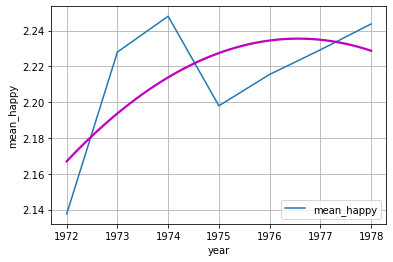

In [ ]:
# plot the trend using matplotlib 
by_year.plot(x = 'year', y = 'mean_happy', grid = True)

# superimpose a quadratic fitted line using the seaborn package, specifying 'order = 2' for quadratic fit
sns.regplot(x = 'year', y = 'mean_happy', data = by_year, order = 2,
            scatter = False, ci = None, fit_reg = True, color = 'm')

In [ ]:
lm_happy_sq = smf.ols('n_happy ~ year + np.square(year)', data = sub).fit()
lm_happy_sq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_happy   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.445
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           0.000587
Time:                        04:31:12   Log-Likelihood:                -10453.
No. Observations:               10554   AIC:                         2.091e+04
Df Residuals:                   10551   BIC:                         2.093e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.339e+04   7131.166     -1.877      0.061   -2.74e+04     593.114
year               13.5465      7.222      1.876      0.061      -0.609      27.702
np.square(year)    -0.0034      0.002     -1.874      0.061      -0.007       0.000
==============================================================================
Omnibus:                      736.996   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.187
Skew:                          -0.243   Prob(JB):                     6.04e-74
Kurtosis:                       2.272   Cond. No.                     4.39e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can expect from the picture, the quadratic model has poor fit since the period is short.

## Subsets by gender

In [ ]:
sub['male'] = np.where(sub.sex==1, 1, 0)

In [ ]:
sub.head()

,happy,year,sex,n_happy,male
0,3.0,1972.0,2.0,1.0,0
1,3.0,1972.0,1.0,1.0,1
2,2.0,1972.0,2.0,2.0,0
3,3.0,1972.0,2.0,1.0,0
4,2.0,1972.0,2.0,2.0,0


In [ ]:
lm_happy_gender = smf.ols('n_happy ~ C(year) + male + C(year)*male', data = sub).fit()
lm_happy_gender.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_happy   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.526
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           1.56e-05
Time:                        04:48:30   Log-Likelihood:                -10437.
No. Observations:               10554   AIC:                         2.090e+04
Df Residuals:                   10540   BIC:                         2.100e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.1698      0.023     94.339      0.000       2.125       2.215
C(year)[T.1973.0]          0.0721      0.033      2.218      0.027       0.008       0.136
C(year)[T.1974.0]          0.1239      0.033      3.795      0.000       0.060       0.188
C(year)[T.1975.0]          0.0329      0.032      1.017      0.309      -0.031       0.096
C(year)[T.1976.0]          0.0555      0.032      1.722      0.085      -0.008       0.119
C(year)[T.1977.0]          0.0718      0.032      2.232      0.026       0.009       0.135
C(year)[T.1978.0]          0.0731      0.032      2.277      0.023       0.010       0.136
male                      -0.0642      0.032     -1.976      0.048      -0.128      -0.001
C(year)[T.1973.0]:male     0.0343      0.047      0.734      0.463      -0.057       0.126
C(year)[T.1974.0]:male    -0.0338      0.047     -0.720      0.471      -0.126       0.058
C(year)[T.1975.0]:male     0.0537      0.047      1.143      0.253      -0.038       0.146
C(year)[T.1976.0]:male     0.0422      0.047      0.900      0.368      -0.050       0.134
C(year)[T.1977.0]:male     0.0368      0.047      0.788      0.431      -0.055       0.128
C(year)[T.1978.0]:male     0.0660      0.047      1.392      0.164      -0.027       0.159
==============================================================================
Omnibus:                      710.971   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.993
Skew:                          -0.245   Prob(JB):                     4.91e-73
Kurtosis:                       2.281   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The interaction terms are not statistically significant, indicating that male and female respondents do not significant difference in happiness.